In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("influence_data.csv", dtype=str, sep=',')#读取表格
IID=data["influencer_id"]#影响者ID
IN=data["influencer_name"]#影响者名称
IG=data["influencer_main_genre"]#影响者流派
IY=data["influencer_active_start"]#影响者年代
FID=data["follower_id"]#跟随者ID
FN=data["follower_name"]#跟随者名称
FG=data["follower_main_genre"]#跟随者流派
FY=data["follower_active_start"]#跟随者年代
net={i:[] for i in IID}#有向影响网络——影响者ID：跟随者ID
num={i:0 for i in IID}#影响者ID：直接影响人数
name={i:"" for i in IID}#影响者ID：影响者名称
DI={i:0 for i in IID}#影响者ID：直接影响
II={i:0 for i in IID}#影响者ID：间接影响

In [2]:
GENRE=['Avant-Garde','Blues','Children\'s','Classical','Comedy/Spoken','Country','Easy Listening','Electronic','Folk','International','Jazz','Latin','New Age','Pop/Rock','R&B;','Reggae','Religious','Stage & Screen','Vocal']

In [2]:
for i in IID:
    net[i]=list(FID[IID==i])
    num[i]=len(net[i])
    name[i]=list(IN[IID==i])[0]
    #AG=len(set(list(data[(IG==list(IG[IID==i])[0]) & (IY==list(IY[IID==i])[0])]['influencer_id'])))
    DI[i]=sum((FY[IID==i].apply(int)-IY[IID==i].apply(int))/10+1)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

for i in range(len(IID)):
    G.add_node(IN[i],ID=IID[i],genre=IG[i],decade=IY[i])
    G.add_node(FN[i],ID=FID[i],genre=FG[i],decade=FY[i])
    G.add_edge(IN[i],FN[i])

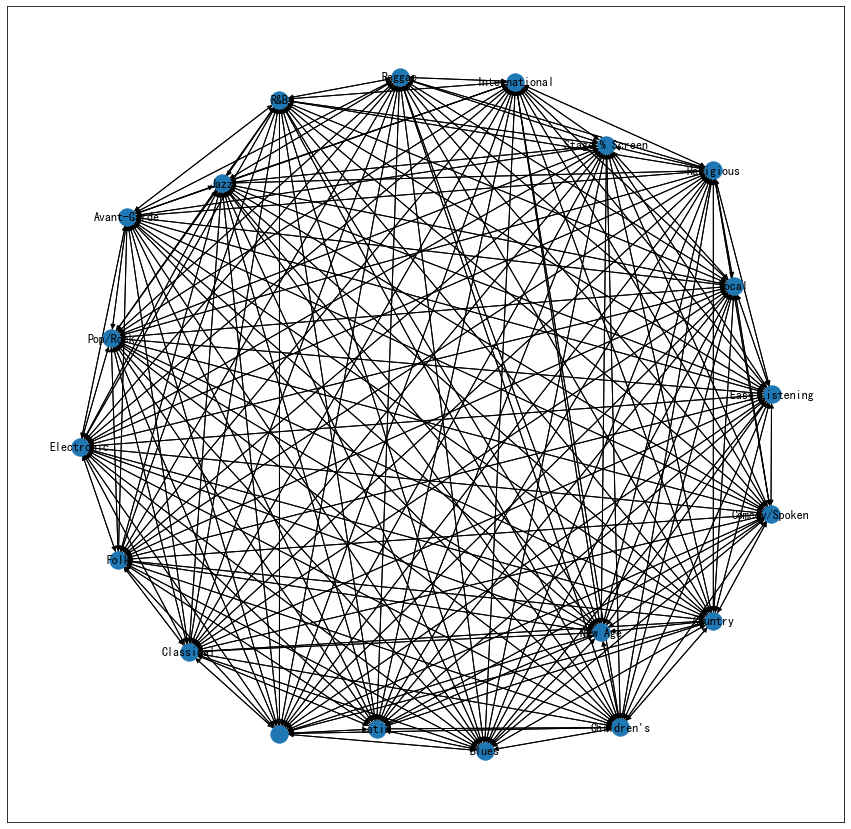

In [141]:
H=nx.DiGraph()

for i in GENRE:
    for j in GENRE:
        if i!=j:
            H.add_node(i)
            H.add_node(j)
            H.add_edge(i,j,weight=0)

plt.figure(figsize=(15,15))
nx.draw_networkx(H)
plt.show()

In [49]:
Decade=2020

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
#n=0
H=nx.MultiDiGraph()
W=[[0]*len(GENRE) for i in range(len(GENRE))]
for i in list(G.nodes(data=True)):
    node=(G.nodes[i[0]]['decade'],G.nodes[i[0]]['genre'])
    if int(node[0])>Decade:
        continue
    f=G.successors(i[0])
    f_nodes_decades=[]
    f_nodes_genres=[]
    while True:
        try:
            n_f=next(f)
            f_nodes_decades.append(G.nodes[n_f]['decade'])
            f_nodes_genres.append(G.nodes[n_f]['genre'])
        except:
            break
    #print(i[0],node,f_nodes_decades,f_nodes_genres)
    j=0
    while j<len(f_nodes_decades):
        #print(node[0])
        #print(f_nodes_decades)
        if f_nodes_decades[j]!=str(Decade):
            if len(f_nodes_decades)!=len(f_nodes_genres):
                print(i[0],node,f_nodes_decades,f_nodes_genres)
                
            del f_nodes_genres[j]
            del f_nodes_decades[j]
        else:
            j+=1
    #print(f_nodes_genres)
    for f in range(len(f_nodes_genres)):
        #if f_nodes_genres[f]!=node[1] and (f_nodes_genres[f] in GENRE) and (node[1] in GENRE):
        if (f_nodes_genres[f] in GENRE) and (node[1] in GENRE):
            W[GENRE.index(node[1])][GENRE.index(f_nodes_genres[f])]+=((int(f_nodes_decades[f])-int(node[0]))/10+1)
    #n+=1
    #if n>10:
        #break

for i in GENRE:
    for j in GENRE:
        #if i!=j and W[GENRE.index(i)][GENRE.index(j)]!=0:
            H.add_node(i,genre=i)
            H.add_node(j,genre=j)
            H.add_edge(i,j,I=W[GENRE.index(i)][GENRE.index(j)])

In [6]:
Wid=sum(W,[])
Wid=[i/20 for i in Wid]

In [31]:
H.edges

OutMultiEdgeView([('Avant-Garde', 'Avant-Garde', 0), ('Avant-Garde', 'Blues', 0), ('Avant-Garde', "Children's", 0), ('Avant-Garde', 'Classical', 0), ('Avant-Garde', 'Comedy/Spoken', 0), ('Avant-Garde', 'Country', 0), ('Avant-Garde', 'Easy Listening', 0), ('Avant-Garde', 'Electronic', 0), ('Avant-Garde', 'Folk', 0), ('Avant-Garde', 'International', 0), ('Avant-Garde', 'Jazz', 0), ('Avant-Garde', 'Latin', 0), ('Avant-Garde', 'New Age', 0), ('Avant-Garde', 'Pop/Rock', 0), ('Avant-Garde', 'R&B;', 0), ('Avant-Garde', 'Reggae', 0), ('Avant-Garde', 'Religious', 0), ('Avant-Garde', 'Stage & Screen', 0), ('Avant-Garde', 'Vocal', 0), ('Blues', 'Avant-Garde', 0), ('Blues', 'Blues', 0), ('Blues', "Children's", 0), ('Blues', 'Classical', 0), ('Blues', 'Comedy/Spoken', 0), ('Blues', 'Country', 0), ('Blues', 'Easy Listening', 0), ('Blues', 'Electronic', 0), ('Blues', 'Folk', 0), ('Blues', 'International', 0), ('Blues', 'Jazz', 0), ('Blues', 'Latin', 0), ('Blues', 'New Age', 0), ('Blues', 'Pop/Rock', 

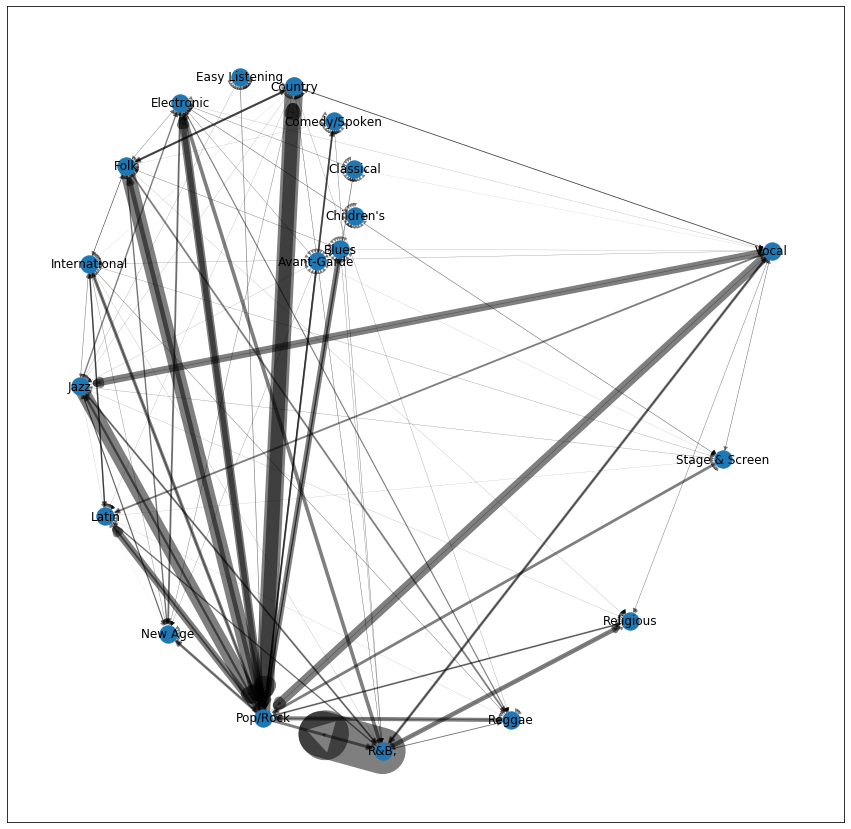

In [38]:
plt.figure(figsize=(15,15))
pos=nx.spiral_layout(H)
#nx.draw(H,pos)
nx.draw_networkx_nodes(H,pos)
nx.draw_networkx_edges(H,pos,width=Wid,alpha=0.5)
#node_labels = nx.get_node_attributes(H,'genre')
edge_labels=nx.get_edge_attributes(H,'I')
nx.draw_networkx_labels(H,pos,Labels=node_labels)
#nx.draw_networkx_edge_labels(H,pos,)
#nx.draw_networkx(H,with_labels=True,node_size=600)
plt.savefig("80.jpg")
plt.show()

In [51]:
W

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
df=pd.DataFrame(data=W,columns=GENRE)
df.to_excel(str(Decade)+'.xlsx')

In [40]:
NL=['754032']
DL=0
WL=0
wei=[]

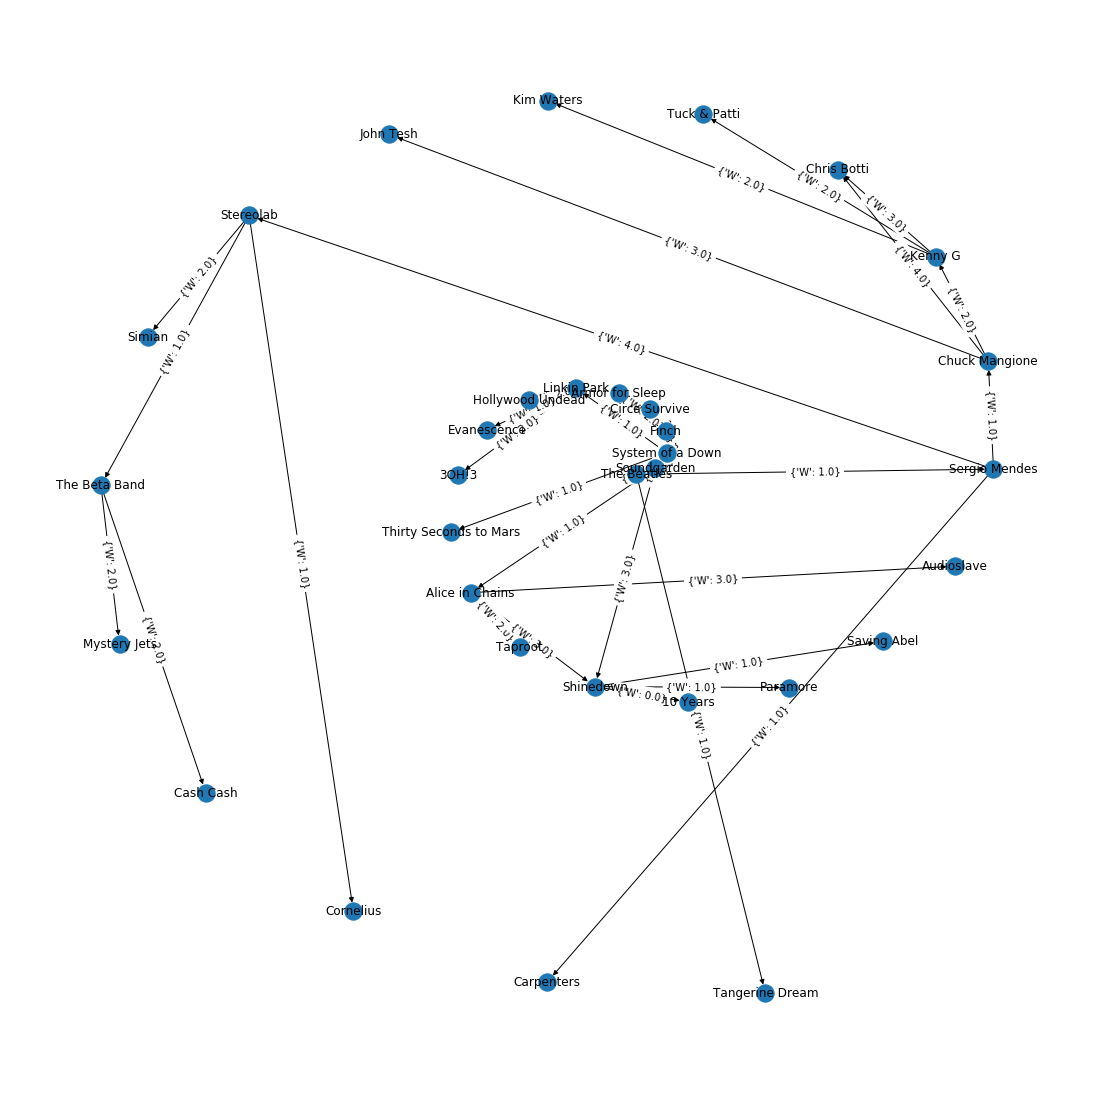

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
g=nx.DiGraph()
# 添加对应的边和点

def tracer(i,g):
    global DL
    global WL
    DL+=1
    if DL>=5:
        DL-=1
        return g
    for f in list(FID[IID==i]):
        g.add_node(list(FN[FID==f])[0],name=list(FN[FID==f])[0],genre=list(FG[IID==i])[0],decade=list(FY[IID==i])[0])
        t=int(list(FY[FID==f])[0])-int(list(IY[IID==i])[0])
        g.add_edge(list(IN[IID==i])[0],list(FN[FID==f])[0],W=(t)/10+1)
        wei.append((t)/10+1)
        WL+=1
        if WL>=3:
            break
        if t<0:
            t=0
        if len(list(FID[IID==f]))>0:
            tt=WL
            WL=0
            g=tracer(f,g)
            WL=tt
        else:
            continue
    DL-=1
    return g


for i in NL:
    g.add_node(list(IN[IID==i])[0],name=list(IN[IID==i])[0],genre=list(IG[IID==i])[0],decade=list(IY[IID==i])[0])
    if len(list(FID[IID==i]))>0:
        tracer(i,g)
    else:
        pass

    
'''plt.figure(figsize=(30,30))
nx.draw_networkx(g)
plt.title('NET',fontsize=20)
plt.savefig("NET.jpg")
plt.show()'''
    
plt.figure(figsize=(15,15))
pos=nx.spiral_layout(g)
nx.draw(g,pos)
node_labels=list(nx.get_node_attributes(g,'name').values())
edge_labels=nx.get_edge_attributes(g,'W')
nx.draw_networkx_labels(g,pos,Labels=node_labels)
nx.draw_networkx_edge_labels(g,pos,Labels=edge_labels)
#nx.draw_networkx(H,with_labels=True,node_size=600)
plt.savefig("NET.jpg")
plt.show()

In [42]:
g.edges

OutEdgeView([('The Beatles', 'Soundgarden'), ('The Beatles', 'Sergio Mendes'), ('The Beatles', 'Tangerine Dream'), ('Soundgarden', 'System of a Down'), ('Soundgarden', 'Alice in Chains'), ('Soundgarden', 'Shinedown'), ('System of a Down', 'Finch'), ('System of a Down', 'Linkin Park'), ('System of a Down', 'Thirty Seconds to Mars'), ('Finch', 'Circa Survive'), ('Finch', 'Armor for Sleep'), ('Linkin Park', 'Hollywood Undead'), ('Linkin Park', 'Evanescence'), ('Linkin Park', '3OH!3'), ('Alice in Chains', 'Taproot'), ('Alice in Chains', 'Shinedown'), ('Alice in Chains', 'Audioslave'), ('Shinedown', '10 Years'), ('Shinedown', 'Paramore'), ('Shinedown', 'Saving Abel'), ('Sergio Mendes', 'Chuck Mangione'), ('Sergio Mendes', 'Stereolab'), ('Sergio Mendes', 'Carpenters'), ('Chuck Mangione', 'Kenny G'), ('Chuck Mangione', 'Chris Botti'), ('Chuck Mangione', 'John Tesh'), ('Kenny G', 'Chris Botti'), ('Kenny G', 'Tuck & Patti'), ('Kenny G', 'Kim Waters'), ('Stereolab', 'Simian'), ('Stereolab', 'The

In [52]:
ss=0
tm=1930
P=[]
while tm!=2020:
    p=[]
    for i in GENRE:
        ss=len(set(list(data[(IG==i) & (IY==str(tm))]['influencer_id'])+list(data[(FG==i) & (FY==str(tm))]['follower_id'])))
        p.append(ss)
    P.append(p)
    tm+=10
df=pd.DataFrame(data=P,columns=GENRE)
df.to_excel('classify+.xlsx')

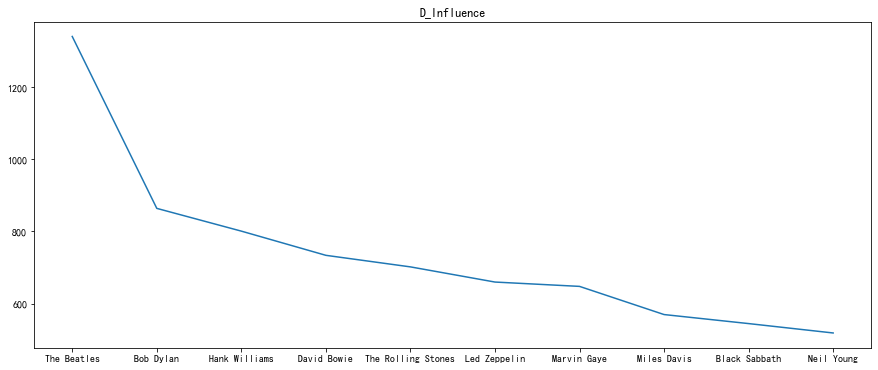

['The Beatles', 'Bob Dylan', 'Hank Williams', 'David Bowie', 'The Rolling Stones', 'Led Zeppelin', 'Marvin Gaye', 'Miles Davis', 'Black Sabbath', 'Neil Young'] [1340.0, 864.0, 801.0, 734.0, 702.0, 660.0, 648.0, 570.0, 545.0, 519.0]


In [30]:
import matplotlib.pyplot as plt

D=sorted(DI.items(),key=lambda x:x[1],reverse=True)#按照直接影响排序
n=10
plt.rcParams['font.sans-serif'] = ['SimHei']
X=[name[D[i][0]] for i in range(n)]
Y=[D[i][1] for i in range(n)]
plt.figure(figsize=(15,6))
plt.title('D_Influence')
plt.plot(X, Y)
plt.savefig('top 10.jpg')
plt.show()
print(X,Y)

In [34]:
D=sorted(DI.items(),key=lambda x:x[1],reverse=True)#按照直接影响排序
D
output=open('data.xls','w',encoding='gbk')
output.write('ID\直接影响\n')
for i in range(len(D)):
    for j in range(len(D[i])):
        output.write(str(D[i][j])) #write函数不能写int类型的参数，所以使用str()转化
        output.write('\t') #相当于Tab一下，换一个单元格
    output.write('\n') #写完一行立马换行
output.close()

In [32]:
net2={i:[] for i in IID}#有向间接影响网络——影响者ID：跟随者ID
num2={i:0 for i in IID}
n=0
m=0
b=0
for i in num.keys():
    s=0
    for f in net[i]:
        try:
            net2[i].extend(list(data["follower_id"][IID==f]))
            num2[i]+=num[f]
            t=list((FY[IID==f].apply(int)-int(list(IY[IID==i])[0]))/10+1)
            for tt in range(len(t)):
                if t[tt]<0:
                    t[tt]=0
            s+=sum(t)
            n+=1
            b+=1
            if n>=10**m:
                m+=1
                print(n)
        except:
            pass
        if b==1000:
            break
    II[i]=s

1
10
100
1000
10000


In [5]:
s=0
t=(list((FY[IID=='95613'].apply(int)-int(list(IY[IID=='188843'])[0]))/10+1))
print(t)
for tt in range(len(t)):
    if t[tt]<0:
        t[tt]=0
print(t)
s+=sum(t)
s

[1.0, 1.0, 0.0, -1.0, 0.0, 1.0, 1.0, -1.0]
[1.0, 1.0, 0.0, 0, 0.0, 1.0, 1.0, 0]


4.0

In [81]:
II['246611']

3102.0

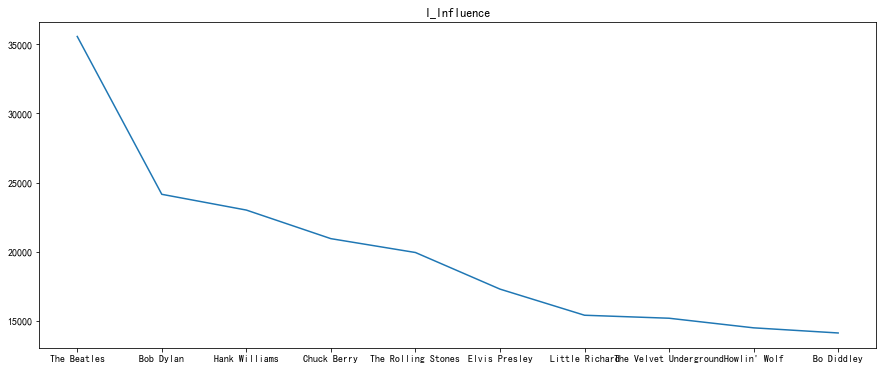

['The Beatles', 'Bob Dylan', 'Hank Williams', 'Chuck Berry', 'The Rolling Stones', 'Elvis Presley', 'Little Richard', 'The Velvet Underground', "Howlin' Wolf", 'Bo Diddley'] [35574.0, 24150.0, 23009.0, 20940.0, 19937.0, 17288.0, 15397.0, 15180.0, 14485.0, 14113.0]


In [35]:
N2=sorted(II.items(),key=lambda x:x[1],reverse=True)#按照间接影响排序
n=10
plt.rcParams['font.sans-serif'] = ['SimHei']
X2=[name[N2[i][0]] for i in range(n)]
Y2=[N2[i][1] for i in range(n)]
plt.figure(figsize=(15,6))
plt.title('I_Influence')
plt.plot(X2, Y2)
plt.savefig('top 10++.jpg')
plt.show()
print(X2,Y2)

In [36]:
output=open('data2.xls','w',encoding='gbk')
output.write('ID\间接影响\n')
for i in range(len(N2)):
    for j in range(len(N2[i])):
        output.write(str(N2[i][j])) #write函数不能写int类型的参数，所以使用str()转化
        output.write('\t') #相当于Tab一下，换一个单元格
    output.write('\n') #写完一行立马换行
output.close()

In [59]:
import pandas as pd
gENRE=['Avant_Garde','Blues','Classical','Comedy_Spoken','Country','Electronic','Folk','International','Jazz','Latin','Pop_Rock','R&B','Reggae','Vocal']
for i in gENRE:
    df=pd.read_csv(i+'.csv')
    df.groupby('year').mean().to_excel('gby'+i+'.xlsx',index=True)